### importing importent libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

# Reading csv and creating DataFrame

In [2]:
df=pd.read_csv("Titanic-Dataset.csv")

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [4]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


##  EDA

In [5]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [6]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

### Data for working

#Age have missing values
#Cabin have missing values
#Embarked have only 2 missing value
#Sex is object type
#Embark is also object type
#cabin is also object type

### Filling missing values

<AxesSubplot:>

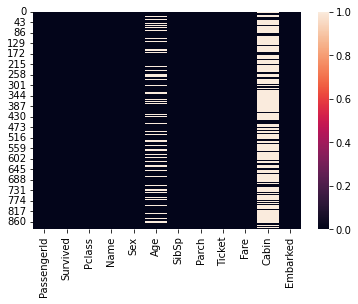

In [7]:
sns.heatmap(df.isnull())

/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Age', ylabel='Density'>

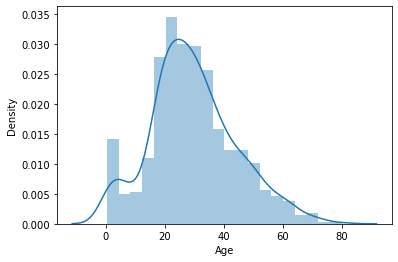

In [8]:
sns.distplot(df['Age'])

In [9]:
df['Age'].isna().sum()

177

In [10]:
df['Age']=df['Age'].fillna(df['Age'].mean())

In [11]:

df['Age'].isnull().sum()

0

In [12]:
df.corr()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,0.033207,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.338481,-0.069809,-0.035322,0.081629,0.257307
Pclass,-0.035144,-0.338481,1.000000,-0.331339,0.083081,0.018443,-0.549500
Age,0.033207,-0.069809,-0.331339,1.000000,-0.232625,-0.179191,0.091566
SibSp,-0.057527,-0.035322,0.083081,-0.232625,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,0.018443,-0.179191,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,-0.549500,0.091566,0.159651,0.216225,1.000000


<AxesSubplot:>

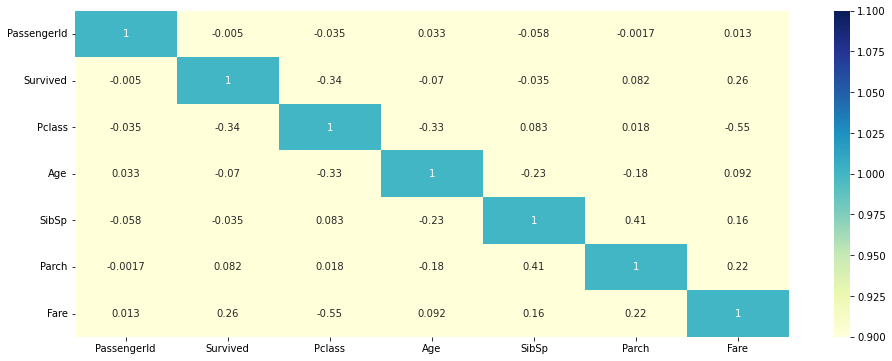

In [13]:
plt.figure(figsize=(16,6))
sns.heatmap(df.corr(), cmap="YlGnBu",vmin=1,vmax=1,annot=True)

/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Age', ylabel='Density'>

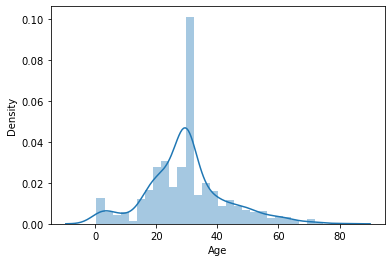

In [14]:
sns.distplot(df['Age'])

In [15]:
#converting sex col object to int
le=LabelEncoder()
le.fit_transform(df['Sex'])

array([1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1,
       0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0,
       0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1,
       0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0,
       1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1,
       0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0,
       1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0,

In [16]:
df['Sex']=le.fit_transform(df['Sex'])

In [17]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.000000,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.000000,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",0,26.000000,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.000000,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",1,35.000000,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",1,27.000000,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",0,19.000000,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",0,29.699118,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",1,26.000000,0,0,111369,30.0000,C148,C


In [18]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [19]:
#converting cabin type from object to int and handelling missing values

In [20]:
df['Cabin'].mode()[1][0:2]

'C2'

In [21]:
df['Cabin']=df['Cabin'].fillna(df['Cabin'].mode()[1][0:2])

In [22]:
df['Cabin'].isnull().sum()

0

In [23]:
a=df['Embarked'].mode()[0]

In [24]:
df['Embarked']=df["Embarked"].fillna(a)

In [25]:
print(df.info())
print(df.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    int64  
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        891 non-null    object 
 11  Embarked     891 non-null    object 
dtypes: float64(2), int64(6), object(4)
memory usage: 83.7+ KB
None
PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64


In [26]:
#moving Survived col to end side
df2=df['Survived']

In [27]:
df=df.drop(['Survived'],axis=1)

In [28]:
df['Survived']=df2

In [29]:
df

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived
0,1,3,"Braund, Mr. Owen Harris",1,22.000000,1,0,A/5 21171,7.2500,C2,S,0
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.000000,1,0,PC 17599,71.2833,C85,C,1
2,3,3,"Heikkinen, Miss. Laina",0,26.000000,0,0,STON/O2. 3101282,7.9250,C2,S,1
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.000000,1,0,113803,53.1000,C123,S,1
4,5,3,"Allen, Mr. William Henry",1,35.000000,0,0,373450,8.0500,C2,S,0
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,2,"Montvila, Rev. Juozas",1,27.000000,0,0,211536,13.0000,C2,S,0
887,888,1,"Graham, Miss. Margaret Edith",0,19.000000,0,0,112053,30.0000,B42,S,1
888,889,3,"Johnston, Miss. Catherine Helen ""Carrie""",0,29.699118,1,2,W./C. 6607,23.4500,C2,S,0
889,890,1,"Behr, Mr. Karl Howell",1,26.000000,0,0,111369,30.0000,C148,C,1


In [30]:
df3=df.drop(['Name','Ticket'],axis=1)

In [31]:
df3['Cabin']=le.fit_transform(df3['Cabin'])

In [32]:
df3['Embarked']=le.fit_transform(df3['Embarked'])

In [33]:
x=df3.drop(['Survived','PassengerId',],axis=1)

In [34]:
x

,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,3,1,22.000000,1,0,7.2500,61,2
1,1,0,38.000000,1,0,71.2833,81,0
2,3,0,26.000000,0,0,7.9250,61,2
3,1,0,35.000000,1,0,53.1000,55,2
4,3,1,35.000000,0,0,8.0500,61,2
...,...,...,...,...,...,...,...,...
886,2,1,27.000000,0,0,13.0000,61,2
887,1,0,19.000000,0,0,30.0000,30,2
888,3,0,29.699118,1,2,23.4500,61,2
889,1,1,26.000000,0,0,30.0000,60,0


In [35]:
y=df3["Survived"]

In [36]:
y

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64

In [37]:
from sklearn.model_selection import train_test_split


In [38]:
x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=0.40,random_state=4)

In [39]:
x_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 356 entries, 150 to 122
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    356 non-null    int64  
 1   Sex       356 non-null    int64  
 2   Age       356 non-null    float64
 3   SibSp     356 non-null    int64  
 4   Parch     356 non-null    int64  
 5   Fare      356 non-null    float64
 6   Cabin     356 non-null    int64  
 7   Embarked  356 non-null    int64  
dtypes: float64(2), int64(6)
memory usage: 25.0 KB


In [40]:
x_test

,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
646,3,1,19.000000,0,0,7.8958,61,2
876,3,1,20.000000,0,0,9.8458,61,2
359,3,0,29.699118,0,0,7.8792,61,1
194,1,0,44.000000,0,0,27.7208,28,0
819,3,1,10.000000,3,2,27.9000,61,2
...,...,...,...,...,...,...,...,...
721,3,1,17.000000,1,0,7.0542,61,2
206,3,1,32.000000,1,0,15.8500,61,2
784,3,1,25.000000,0,0,7.0500,61,2
91,3,1,20.000000,0,0,7.8542,61,2


In [41]:
y_train

150    0
704    0
82     1
87     0
141    1
      ..
360    0
709    1
439    0
174    0
122    0
Name: Survived, Length: 356, dtype: int64

In [42]:
y_test

646    0
876    0
359    1
194    1
819    0
      ..
721    0
206    0
784    0
91     0
292    0
Name: Survived, Length: 535, dtype: int64

In [43]:
from sklearn.linear_model import LogisticRegression

In [44]:
model=LogisticRegression()

In [46]:
model.fit(x_train,y_train)

/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [47]:
model.coef_

array([[-9.80610989e-01, -2.24117577e+00, -3.37752467e-02,
        -3.28076463e-01, -6.35025947e-02, -2.06679041e-03,
         4.85293237e-03, -2.88445475e-01]])

In [48]:
model.intercept_

array([4.58551542])

In [53]:
model.score(x_train,y_train)

0.7808988764044944

In [54]:
pred=model.score(x_train,y_train)

In [55]:
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report

In [66]:
pred=model.predict(x_test)

In [67]:
confusion_matrix(y_test,pred)

array([[298,  43],
       [ 56, 138]])

In [70]:
accuracy_score(y_test,pred)

0.8149532710280374

In [71]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.84      0.87      0.86       341
           1       0.76      0.71      0.74       194

    accuracy                           0.81       535
   macro avg       0.80      0.79      0.80       535
weighted avg       0.81      0.81      0.81       535

